# Open Street Map

What is open street map?
- https://www.openstreetmap.org/

OSMnx
- library documentation (https://osmnx.readthedocs.io)
- github (https://github.com/gboeing/osmnx)
- Examples and demos are available at: https://github.com/gboeing/osmnx-examples

Lesson flow inspiration:
- https://youtu.be/QQmvq1cQHrk

In [1]:
import osmnx as ox

In [2]:
import geopandas as gpd

<div class="alert alert-info">
    osmnx uses nominatim to geocode and find places
    https://nominatim.openstreetmap.org/ui/search.html
</div>

In [3]:
# find a place
place_name = 'Culver City, California'

In [4]:
# get it
graph = ox.graph_from_place(place_name)

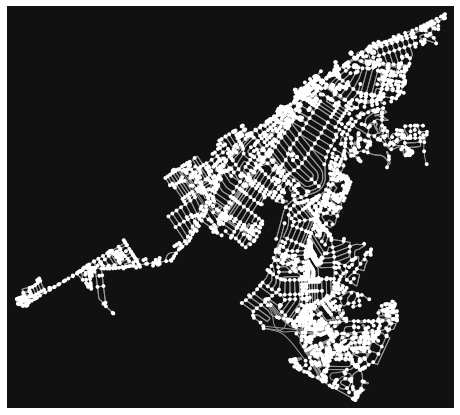

(<Figure size 576x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x22fe04e96a0>)

In [5]:
# plot it
ox.plot_graph(graph)

In [21]:
# convert this graph, networkx, to geodataframe
# it has two objects, nodes and edges
nodes, edges = ox.graph_to_gdfs(graph)

In [22]:
nodes.head()

,y,x,osmid,highway,ref,geometry
3701497859,33.988565,-118.380098,3701497859,NaN,NaN,POINT (-118.38010 33.98857)
307150853,33.988316,-118.396647,307150853,NaN,NaN,POINT (-118.39665 33.98832)
3701497861,33.988569,-118.380291,3701497861,NaN,NaN,POINT (-118.38029 33.98857)
3633168396,34.006881,-118.388679,3633168396,NaN,NaN,POINT (-118.38868 34.00688)
123650067,34.017054,-118.375017,123650067,NaN,NaN,POINT (-118.37502 34.01705)


In [23]:
edges.head()

,osmid,highway,service,oneway,length,geometry,name,access,lanes,maxspeed,ref,bridge,tunnel,junction,u,v,key
0,366163182,service,driveway,False,17.800,"LINESTRING (-118.38010 33.98857, -118.38029 33...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3701497859,3701497861,0
1,"[366163186, 366163182]",service,driveway,False,252.609,"LINESTRING (-118.38010 33.98857, -118.37998 33...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3701497859,3701497849,0
2,366163184,service,driveway,False,104.367,"LINESTRING (-118.38010 33.98857, -118.38010 33...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3701497859,3701497849,1
3,56181716,service,alley,False,61.081,"LINESTRING (-118.39665 33.98832, -118.39599 33...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,307150853,705015370,0
4,"[56181717, 13333159]","[residential, service]",alley,False,154.982,"LINESTRING (-118.39665 33.98832, -118.39661 33...",Corryne Place,NaN,NaN,NaN,NaN,NaN,NaN,NaN,307150853,705015370,1


In [6]:
# get the place polygon
area = ox.geocode_to_gdf(place_name)

In [7]:
area

,geometry,place_name,bbox_north,bbox_south,bbox_east,bbox_west
0,"POLYGON ((-118.44838 33.99334, -118.44716 33.9...","Culver City, Los Angeles County, California, U...",34.035086,33.976867,-118.369595,-118.448377


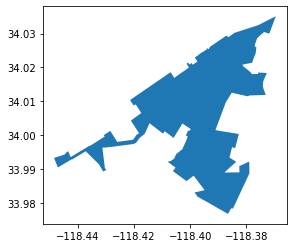

In [8]:
area.plot()

In [9]:
buildings = ox.footprints_from_place(place_name)

In [12]:
type(buildings)

geopandas.geodataframe.GeoDataFrame

In [13]:
buildings.sample(3)

,nodes,amenity,building,ele,height,lacounty:ain,lacounty:bld_id,start_date,geometry,building:units,...,payment:visa,denomination,religion,service_times,members,type,gnis:county_id,gnis:created,gnis:feature_id,gnis:state_id
422079220,"[4218082389, 4218082435, 4218082412, 421808242...",NaN,house,16.7,5.1,4215020015,438479823355,1952,"POLYGON ((-118.40653 34.00205, -118.40643 34.0...",1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
421438361,"[4211967198, 4211967292, 4211967303, 421196729...",NaN,house,15.8,4.4,4231023020,430580820764,1925,"POLYGON ((-118.43250 33.99475, -118.43251 33.9...",1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
439267153,"[4368974081, 4368974053, 4368974012, 436897405...",NaN,commercial,24.9,3.8,4208022001,436661828207,1963,"POLYGON ((-118.41247 34.01539, -118.41241 34.0...",1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Points of interest
- https://osmnx.readthedocs.io/en/stable/osmnx.html#module-osmnx.pois

List of tags, or "amenities"
- https://wiki.openstreetmap.org/wiki/Key:amenity

In [43]:
# retrieve restaurants
restaurants = ox.pois_from_place(place_name, tags = {'amenity': ['restaurant']})
schools = ox.pois_from_place(place_name, tags = {'amenity': ['school']})

In [44]:
len(schools)

25

## Plotting all this data

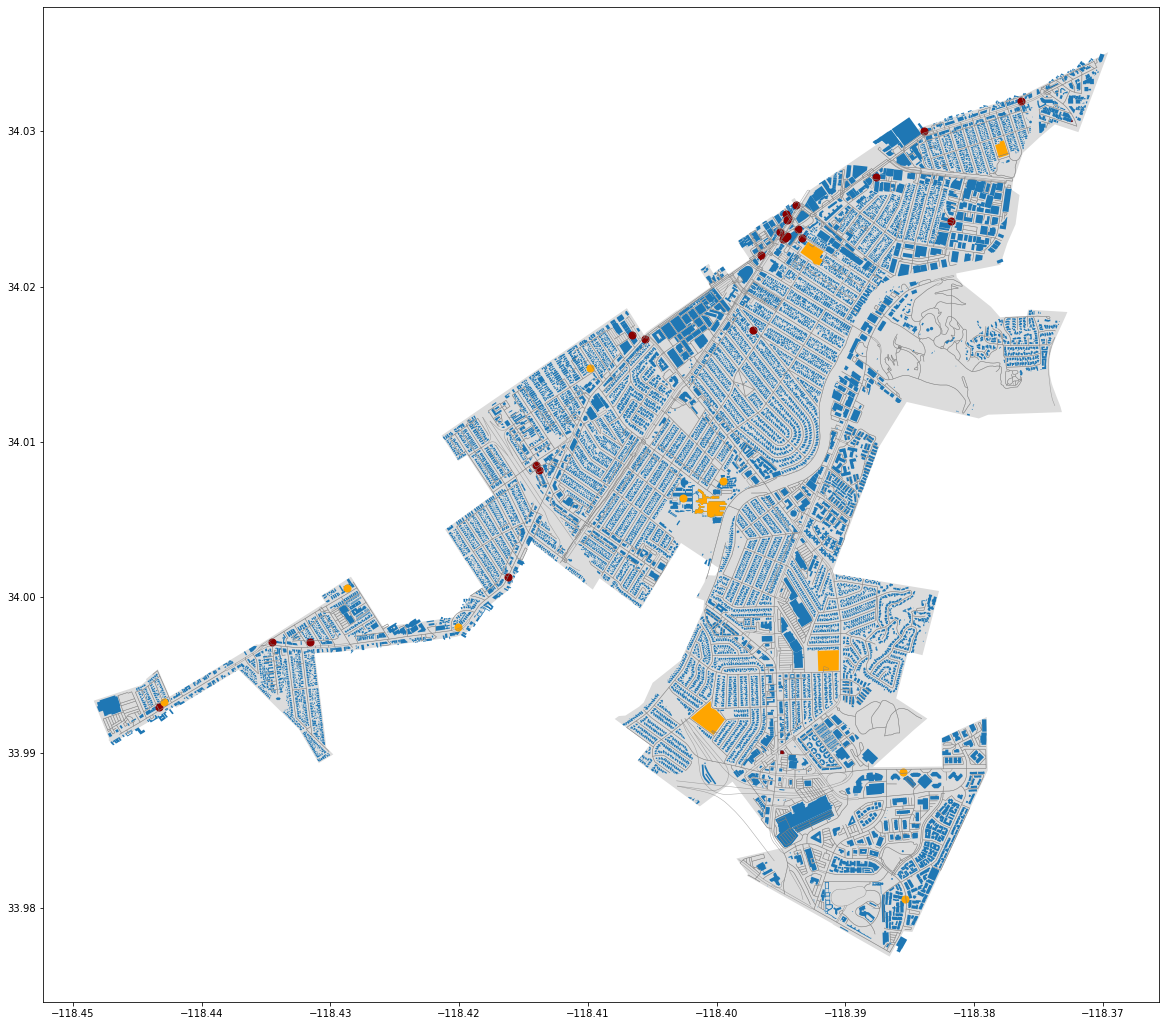

In [45]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(20,20))

# plot the area polygon
area.plot(ax=ax, facecolor='gainsboro')

# plot the street edges
edges.plot(ax=ax, edgecolor='gray', linewidth=0.5, alpha=0.7)

# plot building footprints
buildings.plot(ax=ax)

# plot restaurants
restaurants.plot(ax=ax,color='darkred',markersize=50)

# plot schools
schools.plot(ax=ax,color='orange',markersize=50)

In [40]:
# what about parks?
leisure = ox.footprints_from_place(place_name, footprint_type='leisure')

In [41]:
leisure.head()

,nodes,leisure,sport,geometry,source,surface,ele,gnis:county_id,gnis:created,gnis:edited,...,addr:state,addr:street,hoops,members,attribution,boundary,csp:globalid,csp:unitcode,park:type,type
22724437,"[2276235989, 2276236025, 7821388873, 243746492...",pitch,baseball,"POLYGON ((-118.38597 34.01565, -118.38590 34.0...",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22724442,"[243746536, 243746537, 243746538, 5521088661, ...",pitch,skateboard,"POLYGON ((-118.38791 34.01583, -118.38803 34.0...",DigitalGlobe,concrete,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22724454,"[243746741, 2276240868, 2276240873, 243746742,...",pitch,baseball,"POLYGON ((-118.38583 34.01698, -118.38596 34.0...",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22729467,"[243801292, 243801293, 243801294, 243801295, 2...",park,NaN,"POLYGON ((-118.40395 34.01193, -118.40219 34.0...",NaN,NaN,20,037,01/19/1981,07/19/2007,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22729480,"[243801994, 7821347903, 243801995, 243801996, ...",sports_centre,swimming,"POLYGON ((-118.40156 34.01252, -118.40192 34.0...",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
# distinct count?
leisure["leisure"].value_counts()

pitch            22
park             14
swimming_pool    10
garden            3
playground        3
sports_centre     1
track             1
Name: leisure, dtype: int64

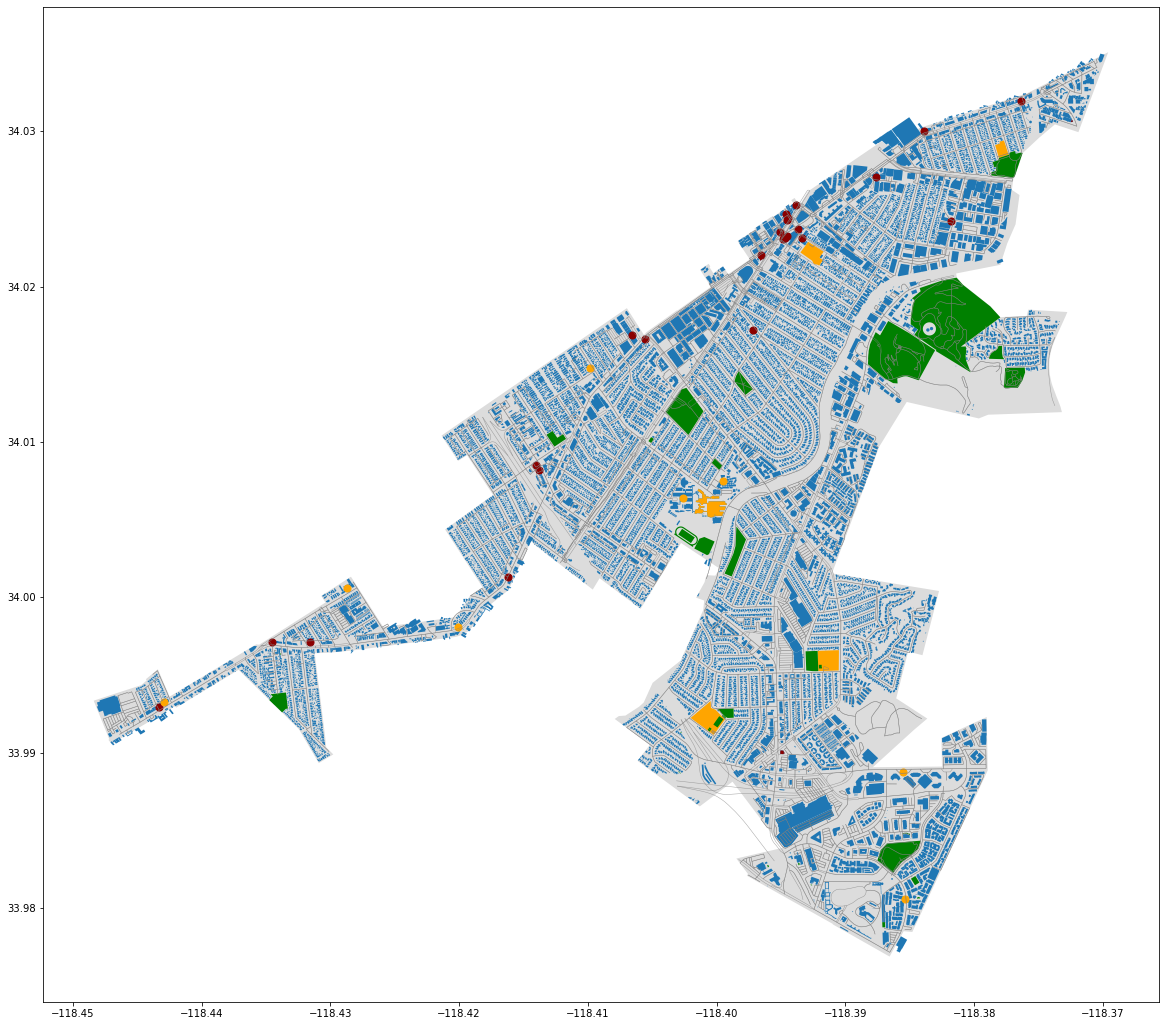

In [47]:
fig, ax = plt.subplots(figsize=(20,20))

# plot the area polygon
area.plot(ax=ax, facecolor='gainsboro')

# plot the street edges
edges.plot(ax=ax, edgecolor='gray', linewidth=0.5, alpha=0.7)

# plot building footprints
buildings.plot(ax=ax)

# plot restaurants
restaurants.plot(ax=ax,color='darkred',markersize=50)

# plot schools
schools.plot(ax=ax,color='orange',markersize=50)

# plot green areas
leisure.plot(ax=ax,color='green')

In [ ]:
# neighborhoods or boroughs


gdf = ox.geocode_to_gdf('Los Angeles, Los Angeles, California, USA')


In [ ]:
# get the boundary polygon for manhattan, project it, and plot it
city = ox.geocode_to_gdf('Los Angeles, California, USA')

In [ ]:
city_proj = ox.project_gdf(city)
ax = city_proj.plot(fc='gray', ec='none',figsize=(10,10))
# ax = ax.axis('off')

In [ ]:
# define a bounding box in Culver City
north, south, east, west = 34.03, 33.99, -118.37, -118.42

# create network from that bounding box
G = ox.graph_from_bbox(north, south, east, west)
fig, ax = ox.plot_graph(G)

In [ ]:
ox.plot_graph_folium(G, edge_color='r')

In [ ]:
# define a point at UCLA
location_point = (34.069624774724886, -118.44500631093979)

# create network from point, inside bounding box of N, S, E, W each 750m from point
G = ox.graph_from_point(location_point, dist=750,
                        dist_type='bbox', network_type='all') # try "drive" and "walk"
fig, ax = ox.plot_graph(G)

In [ ]:
ox.plot_graph_folium(G,  edge_linewidth=1, edge_color='r')
# ox.plot_graph_folium(G)

In [ ]:
ox.basic_stats(G)

In [ ]:
# same point again, but create network only of nodes within 750m along the network from point
G = ox.graph_from_point(location_point, dist=750, 
                        dist_type='network')
fig, ax = ox.plot_graph(G, node_color='r')

In [ ]:
# network from address, including only nodes within 1km along the network from the address
G = ox.graph_from_address(address='UCLA, Los Angeles, CA', dist=1000,
                          dist_type='network', network_type='all')

fig, ax = ox.plot_graph(G, node_color='r')


In [ ]:
%%time
gdf = ox.footprints.footprints_from_place(place='UCLA, California, USA')
gdf_proj = ox.project_gdf(gdf)
fig, ax = ox.plot_footprints(gdf_proj)
# Image(fp, height=size, width=size)

In [ ]:
fig, ax = ox.plot_graph(G,
    ax=None,               #optionally draw on pre-existing axis
    figsize=(8, 8),        #figure size to create if ax is None
    bgcolor="#111111",     #background color of the plot
    node_color="w",        #color of the nodes
    node_size=15,          #size of the nodes: if 0, skip plotting them
    node_alpha=None,       #opacity of the nodes
    node_edgecolor="none", #color of the nodes' markers' borders
    node_zorder=1,         #zorder to plot nodes: edges are always 1, so set node_zorder=0 to plot nodes below edges
    edge_color="#999999",  #color of the edges
    edge_linewidth=1,      #width of the edges: if 0, skip plotting them
    edge_alpha=None,       #opacity of the edges
    show=True,             #if True, call pyplot.show() to show the figure
    close=False,           #if True, call pyplot.close() to close the figure: useful if plotting/saving many in a loop
    save=False,            #if True, save figure to disk at filepath
    filepath=None,         #if save is True, the path to the file
    dpi=300,               #if save is True, the resolution of saved file
    bbox=None)             #bounding box to constrain plot: if None, will calculate from spatial extents of graphＢ

In [ ]:
# get everything tagged amenity,
# and everything with landuse = retail or commercial,
# and everything with highway = bus_stop
tags = {'amenity' : True,
#         'landuse' : ['retail', 'commercial'],
#         'highway' : 'bus_stop'
       }
poi = ox.pois_from_place('Culver City, California, USA', tags)
poi.shape

In [ ]:
poi.head()

In [ ]:
poi.amenity.unique()

In [ ]:
poi.groupby(['amenity']).count()['osmid'].reset_index(name='count').sort_values(['count'], ascending=False)

In [ ]:
poi[poi.amenity=='school']

In [ ]:
poi[poi.amenity=='school'].plot(figsize=(10,10))

In [ ]:
# elevation. street nodes susceptible to flooding?
